In [33]:
import numpy as np
import utils
import qiskit
import matplotlib.pyplot as plt

In [48]:
provider = qiskit.IBMQ.load_account()

/home/user/.local/lib/python3.6/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '
ibmqfactory.load_account:WARNING:2021-03-09 02:44:37,221: Credentials are already in use. The existing account in the session will be replaced.


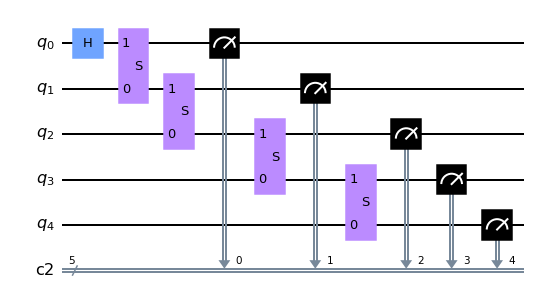

In [26]:
linear_interactions = {(i, i + 1): 1 for i in range(4)}
linear_circ = utils.linear_circuit(5, linear_interactions)
linear_circ.add_register(qiskit.ClassicalRegister(5))
linear_circ.measure(range(5), range(5))
linear_circ.draw('mpl')

In [28]:
backend = provider.get_backend('ibmq_lima')
job = qiskit.execute(linear_circ, backend)
qiskit.tools.job_monitor(job)

Job Status: job has successfully run


In [34]:
backend_sim = provider.get_backend('ibmq_qasm_simulator')
job_sim = qiskit.execute(linear_circ, backend_sim)

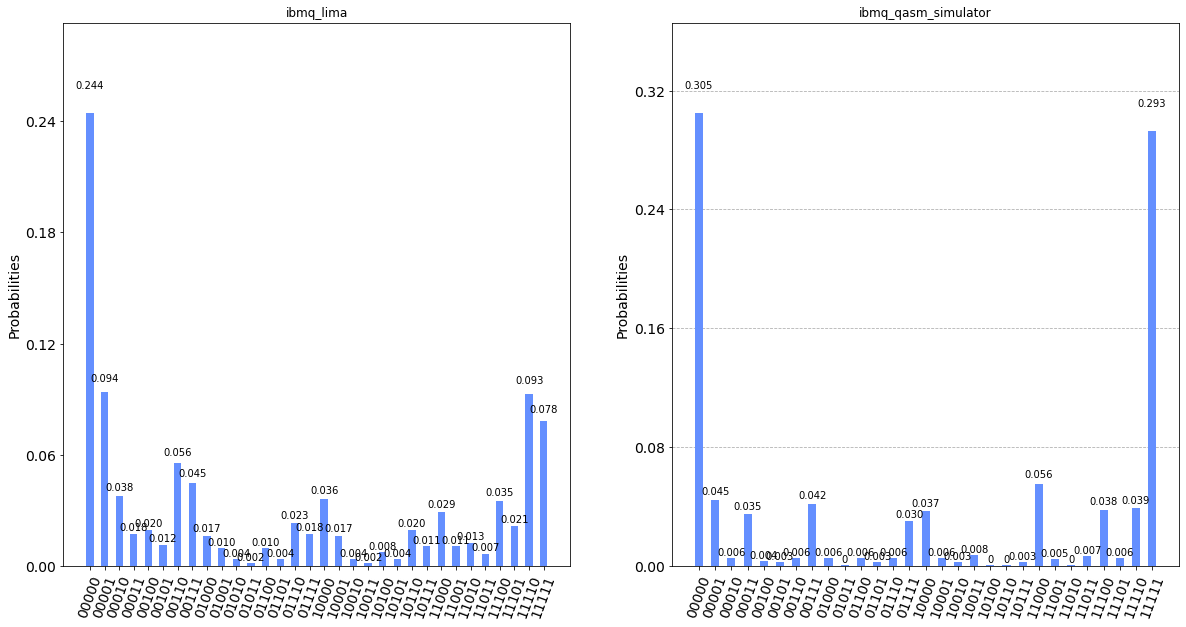

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.set_title('ibmq_lima')
ax2.set_title('ibmq_qasm_simulator')
fig.set_size_inches(20, 10)
result = job.result()
result_sim = job_sim.result()
qiskit.visualization.plot_histogram(result.get_counts(linear_circ), ax=ax1)
qiskit.visualization.plot_histogram(result_sim.get_counts(linear_circ), ax=ax2)

In [31]:
utils.get_probs_distribution(5, linear_interactions)

,s,Pr[s]
0,"[-1, -1, -1, -1, -1]",0.300936
1,"[-1, -1, -1, -1, 1]",0.040727
2,"[-1, -1, -1, 1, -1]",0.005512
3,"[-1, -1, -1, 1, 1]",0.040727
4,"[-1, -1, 1, -1, -1]",0.005512
5,"[-1, -1, 1, -1, 1]",0.000746
6,"[-1, -1, 1, 1, -1]",0.005512
7,"[-1, -1, 1, 1, 1]",0.040727
8,"[-1, 1, -1, -1, -1]",0.005512
9,"[-1, 1, -1, -1, 1]",0.000746
